In [1]:
sports_keywords = {
    "Swimming": ["Swimming", "Freestyle Swimming", "Butterfly Swimming", "Backstroke", "Breaststroke", "Individual Medley"],
    "Athletics": ["Athletics", "Track and Field", "Running", "Sprinting", "Marathon", "High Jump", "Long Jump"],
    "Baseball": ["Baseball", "MLB", "Hardball", "Baseball Game", "Batting"],
    "Softball": ["Softball", "Fastpitch Softball", "Slowpitch Softball"],
    "Breaking": ["Breaking", "Breakdancing", "B-Boying", "Hip Hop Dance", "Street Dance"],
    "Cricket": ["Cricket", "Test Cricket", "ODI Cricket", "T20 Cricket", "The Ashes", "Cricket Match"],
    "Cycling-BMX Freestyle": ["Cycling BMX", "BMX Freestyle", "Bicycle Motocross", "Freestyle BMX Tricks"],
    "Cycling-Track": ["Cycling Track", "Track Cycling", "Velodrome Cycling", "Sprint Cycling"],
    "Equestrian-Jumping": ["Equestrian Jumping", "Show Jumping", "Horse Jumping", "Equestrian Sports"],
    "Flag Football": ["Flag Football", "Non-Contact Football", "Flag American Football"],
    "Football": ["Football", "Soccer", "FIFA", "World Cup", "Football Match"],
    "Gymnastics-Artistic": ["Artistic Gymnastics", "Floor Exercise", "Balance Beam", "Pommel Horse", "Uneven Bars"],
    "Karate": ["Karate", "Martial Arts", "Shotokan Karate", "Kyokushin", "Kumite"],
    "Lacrosse-Sixes": ["Lacrosse", "Sixes Lacrosse", "Field Lacrosse", "Box Lacrosse"],
    "Rowing-Coastal": ["Rowing Coastal", "Coastal Rowing", "Rowing Regatta", "Beach Sprint Rowing"],
    "Sailing": ["Sailing", "Yachting", "Boat Sailing", "Sailing Regatta", "Yacht Racing"],
    "Skateboarding": ["Skateboarding", "Street Skating", "Vert Skating", "Skatepark", "Skateboarding Tricks"],
    "Squash": ["Squash", "Racket Sports", "Squash Court", "Squash Game", "Hardball Squash"]
}


In [2]:
# 导入必要的库
import os
import pandas as pd
from pytrends.request import TrendReq
import time
import random

# 定义 CSV 文件路径
csv_filename = os.path.join(os.getcwd(), "google_trends_10_years_data.csv")


In [3]:
# Google Trends 数据提取函数
def fetch_google_trends_avg(keywords, timeframe='2014-01-01 2024-10-10', geo=''):
    pytrends = TrendReq(hl='en-US', tz=360)
    total_avg = 0
    count = 0
    for keyword in keywords:
        try:
            pytrends.build_payload([keyword], cat=0, timeframe=timeframe, geo=geo, gprop='')
            data = pytrends.interest_over_time()
            if not data.empty:
                avg_interest = data[keyword].mean()
                total_avg += avg_interest
                count += 1
        except Exception as e:
            print(f"Error fetching Google Trends data for {keyword}: {e}")
            continue
    return total_avg / count if count > 0 else None


In [4]:
# 创建数据框以存储 Google Trends 结果
data = {
    "Sport": [],
    "GoogleTrends_AvgInterest": []
}

# 循环遍历运动项目及其关键词并收集 Google Trends 数据
for sport, keywords in sports_keywords.items():
    print(f"Fetching Google Trends data for {sport} with keywords: {keywords}...")
    avg_interest = fetch_google_trends_avg(keywords)
    data["Sport"].append(sport)
    data["GoogleTrends_AvgInterest"].append(avg_interest)
    
    # 保存进度
    pd.DataFrame(data).to_csv(csv_filename, index=False)
    print(f"Saved progress for {sport}.")
    
    # 随机延迟以避免触发速率限制
    time.sleep(random.uniform(5, 10))  # 延迟 5-10 秒


Fetching Google Trends data for Swimming with keywords: ['Swimming', 'Freestyle Swimming', 'Butterfly Swimming', 'Backstroke', 'Breaststroke', 'Individual Medley']...
Saved progress for Swimming.
Fetching Google Trends data for Athletics with keywords: ['Athletics', 'Track and Field', 'Running', 'Sprinting', 'Marathon', 'High Jump', 'Long Jump']...
Saved progress for Athletics.
Fetching Google Trends data for Baseball with keywords: ['Baseball', 'MLB', 'Hardball', 'Baseball Game', 'Batting']...
Saved progress for Baseball.
Fetching Google Trends data for Softball with keywords: ['Softball', 'Fastpitch Softball', 'Slowpitch Softball']...
Saved progress for Softball.
Fetching Google Trends data for Breaking with keywords: ['Breaking', 'Breakdancing', 'B-Boying', 'Hip Hop Dance', 'Street Dance']...
Saved progress for Breaking.
Fetching Google Trends data for Cricket with keywords: ['Cricket', 'Test Cricket', 'ODI Cricket', 'T20 Cricket', 'The Ashes', 'Cricket Match']...
Saved progress for

In [5]:
# 读取并检查数据
df = pd.read_csv(csv_filename)
print("Data Overview:")
print(df.head())

# 填充空值（若存在）
df['GoogleTrends_AvgInterest'] = df['GoogleTrends_AvgInterest'].fillna(df['GoogleTrends_AvgInterest'].median())

# 显示描述性统计信息
print("\nDescriptive Statistics:")
print(df.describe())

Data Overview:
       Sport  GoogleTrends_AvgInterest
0   Swimming                 15.482051
1  Athletics                 39.285714
2   Baseball                 44.669231
3   Softball                 46.210256
4   Breaking                 29.423077

Descriptive Statistics:
       GoogleTrends_AvgInterest
count                 18.000000
mean                  30.652704
std                   13.741526
min                    7.823077
25%                   21.817692
50%                   30.426923
75%                   43.171044
max                   55.812308


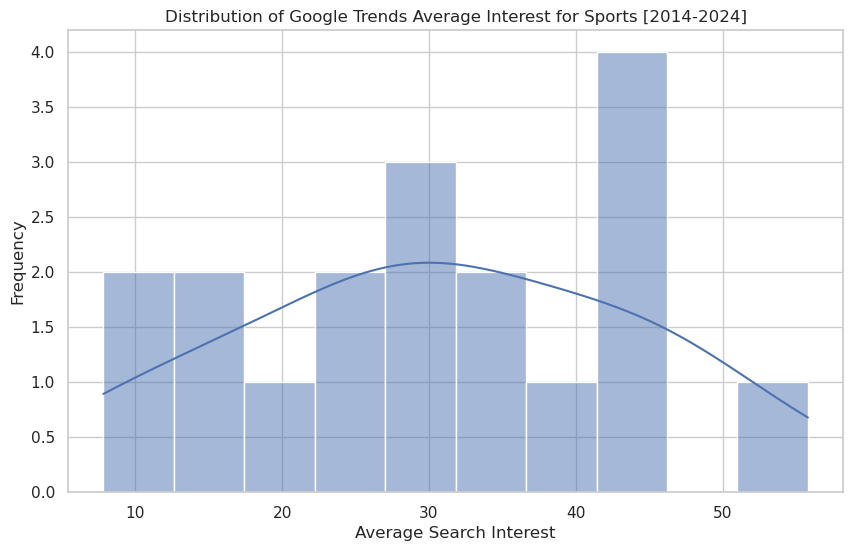

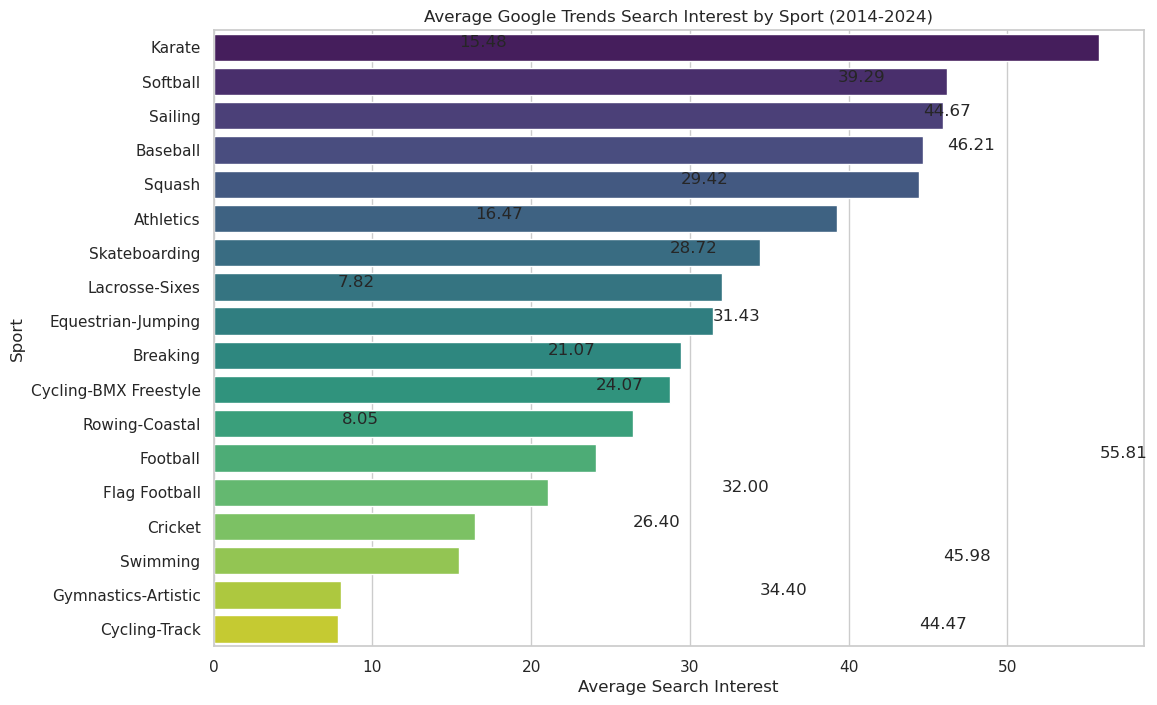

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图样式
sns.set(style="whitegrid")

# 绘制直方图
plt.figure(figsize=(10, 6))
sns.histplot(df['GoogleTrends_AvgInterest'].dropna(), bins=10, kde=True)
plt.title("Distribution of Google Trends Average Interest for Sports [2014-2024]")
plt.xlabel("Average Search Interest")
plt.ylabel("Frequency")
plt.show()

# 绘制条形图
plt.figure(figsize=(12, 8))
df_sorted = df.sort_values(by='GoogleTrends_AvgInterest', ascending=False)
sns.barplot(x='GoogleTrends_AvgInterest', y='Sport', data=df_sorted, palette="viridis")
plt.title("Average Google Trends Search Interest by Sport (2014-2024)")
plt.xlabel("Average Search Interest")
plt.ylabel("Sport")

# 添加数值标注
for index, row in df_sorted.iterrows():
    plt.text(row['GoogleTrends_AvgInterest'], index, f"{row['GoogleTrends_AvgInterest']:.2f}")
plt.show()
